In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("/home/black_tree/Documents/computer_science/capstone-ML-project/data/trainig_data.csv")
df_test = pd.read_csv("/home/black_tree/Documents/computer_science/capstone-ML-project/data/testing_data.csv")

In [3]:
df_train.shape

(177055, 22)

In [4]:
df_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetic
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,3.0,0.0,6.0,0.0,0.0,11.0,4.0,8.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,3.0,2.0,0.0,0.0,0.0,8.0,4.0,3.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,2.0,4.0,0.0,0.0,1.0,6.0,8.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,6.0,4.0,8.0,0.0


In [5]:
x_train = df_train.drop(["Diabetic"], axis=1)
y_train = df_train["Diabetic"]

In [6]:
y_train.isnull().value_counts()

Diabetic
False    177055
Name: count, dtype: int64

In [7]:
x_train.head(2)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,6.0,0.0,0.0,11.0,4.0,8.0


In [8]:
x_test = df_test.drop(["Diabetic"], axis=1)
y_test = df_test["Diabetic"]

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
lr = LogisticRegression(random_state=42)
knnc = KNeighborsClassifier()
rfc = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state = 42)

In [10]:
# intialise the metrics 
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, confusion_matrix

HYPERPARAMETER TUNNING 

In [11]:
lr_param_grid = [{
    "penalty" : ['l1', 'l2'],
    "C" : [0.8 , 1 , 1.2],
    "max_iter" : [500 , 600, 700], 
    "solver" : ['newton-cg','newton-cholesky', 'sag', "saga"]

}]

In [12]:
from sklearn.model_selection import GridSearchCV

rscv = GridSearchCV(lr,
    param_grid = lr_param_grid,
    cv = 5, 
    n_jobs=-1,
    scoring='precision'
)

In [13]:
rscv.fit(X= x_train, y=y_train)

/home/black_tree/Documents/computer_science/capstone-ML-project/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
135 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/home/black_tree/Documents/computer_science/capstone-ML-project/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/black_tree/Documents/computer_science/capstone-ML-project/venv/lib/python3.12/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  

,estimator,LogisticRegre...ndom_state=42)
,param_grid,"[{'C': [0.8, 1, ...], 'max_iter': [500, 600, ...], 'penalty': ['l1', 'l2'], 'solver': ['newton-cg', 'newton-cholesky', ...]}]"
,scoring,'precision'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [14]:
print(f"Highet score of during Randomised search CV is {rscv.best_score_:.3f}")

Highet score of during Randomised search CV is 0.724


In [15]:
print(f"best parameter for respecitve score as {rscv.best_estimator_}")

best parameter for respecitve score as LogisticRegression(C=1.2, max_iter=500, random_state=42, solver='sag')


In [16]:
lr.set_params(C=1.2, max_iter=600, random_state=42, solver='sag')

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.2
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'sag'
,max_iter,600
,multi_class,'deprecated'


In [17]:
lr.fit(x_train , y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.2
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'sag'
,max_iter,600
,multi_class,'deprecated'


In [18]:
p_lr , s_lr = lr.predict(x_train), lr.predict_proba(x_train) 


In [19]:
knn_param_grid = [{
    "n_neighbors" : [3 , 5 , 7 , 9], 
    "algorithm" : ["ball_tree", "kd_tree"], 
    "p" : [1 , 2 ], 

}]

In [20]:
rfc_param_grid = [{
  "n_estimators" : [150, 250, 350], 
  "criterion": ["gini", "entorpy", "log_loss"],
  "max_features" : ["sqrt", "log2", None]  
}]

In [21]:
xgb_param_grid = [{
    "n_estimators": [100, 300, 500],       
    "max_depth": [3, 5, 7],                
    "learning_rate": [0.01, 0.05, 0.1],    
    "subsample": [0.7, 0.8, 1.0]           
}]


In [22]:
rscv.param_grid = knn_param_grid
rscv.estimator = knnc


In [23]:
rscv.fit(x_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"[{'algorithm': ['ball_tree', 'kd_tree'], 'n_neighbors': [3, 5, ...], 'p': [1, 2]}]"
,scoring,'precision'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [24]:
print(f"Highet score of during Randomised search CV is {rscv.best_score_:.3f}")

Highet score of during Randomised search CV is 0.758


In [25]:
print(f"best parameter for respecitve score as {rscv.best_estimator_}")


best parameter for respecitve score as KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3, p=1)


In [26]:
knnc.set_params(algorithm='ball_tree', n_neighbors=3, p=1)

,n_neighbors,3
,weights,'uniform'
,algorithm,'ball_tree'
,leaf_size,30
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [27]:
knnc.fit(x_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'ball_tree'
,leaf_size,30
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [28]:
p_knn, s_knn = knnc.predict(x_train), knnc.predict_proba(x_train)

In [29]:
rscv.param_grid = rfc_param_grid
rscv.estimator = rfc


In [30]:
rscv.fit(x_train, y_train)

/home/black_tree/Documents/computer_science/capstone-ML-project/venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/black_tree/Documents/computer_science/capstone-ML-project/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/black_tree/Documents/computer_science/capstone-ML-project/venv/lib/python3.12/site-packages/sklearn/mode

,estimator,RandomForestC...ndom_state=42)
,param_grid,"[{'criterion': ['gini', 'entorpy', ...], 'max_features': ['sqrt', 'log2', ...], 'n_estimators': [150, 250, ...]}]"
,scoring,'precision'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,150


In [31]:
print(f"Highet score of during grid search CV is {rscv.best_score_:.3f}")

Highet score of during grid search CV is 0.809


In [32]:
print(f"best parameter for respecitve score as {rscv.best_params_}")
bp = rscv.best_params_

best parameter for respecitve score as {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 150}


In [33]:
rfc.set_params(n_estimators = bp["n_estimators"], criterion = bp["criterion"], max_features = bp["max_features"])

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
rfc.fit(x_train, y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
p_rfc , s_rfc = rfc.predict(x_train), rfc.predict_proba(x_train)

In [36]:
rscv.param_grid = xgb_param_grid
rscv.estimator = xgb

In [37]:
rscv.fit(x_train, y_train)

/home/black_tree/Documents/computer_science/capstone-ML-project/venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"[{'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], 'n_estimators': [100, 300, ...], 'subsample': [0.7, 0.8, ...]}]"
,scoring,'precision'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [38]:
print(f"Highet score of during Grid search CV is {rscv.best_score_:.3f}")

Highet score of during Grid search CV is 0.743


In [39]:
print(f"best parameter for respecitve score as {rscv.best_params_}")

best parameter for respecitve score as {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.8}


In [40]:
xgb.set_params(learning_rate = 0.1, max_depth= 7, n_estimators= 500, subsample= 0.8)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [41]:
xgb.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [42]:
p_xgb, s_xgb = xgb.predict(x_train), xgb.predict_proba(x_train)

In [ ]:
pred = [p_lr, p_knn, p_rfc, p_xgb]
probab = [s_lr, s_knn, s_rfc, s_xgb]

EVALUATING THE NEW MODELS 

In [44]:
acc = {"lr": None,
       "knnc": None, "rfc": None, "xgb": None}
recall = {"lr": None, 
       "knnc": None, "rfc": None, "xgb": None}
presc = {"lr": None, 
       "knnc": None, "rfc": None, "xgb": None}
roc = {"lr": None, 
       "knnc": None, "rfc": None, "xgb": None}
cm = {"lr": None, 
       "knnc": None, "rfc": None, "xgb": None}

In [45]:
all_the_models = [lr,
knnc,
rfc,
xgb,]

In [57]:
import pickle
import os

# Assuming these are your trained models
all_the_models = [lr, knnc, rfc, xgb]
model_names = ["logistic_regression", "knn_classifier", "random_forest", "xgboost"]

# Create folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save each model
for name, model in zip(model_names, all_the_models):
    file_path = f"models/{name}.pkl"
    with open(file_path, "wb") as f:
        pickle.dump(model, f)
    print(f"Saved {name} at {file_path}")


Saved logistic_regression at models/logistic_regression.pkl
Saved knn_classifier at models/knn_classifier.pkl
Saved random_forest at models/random_forest.pkl
Saved xgboost at models/xgboost.pkl


In [46]:
for p in pred:
    print(p.shape)

(177055,)
(177055,)
(177055,)
(177055,)


In [47]:
for model in all_the_models:
    i = 0
    for key in acc:
        acc[key] = accuracy_score(y_true= y_train, y_pred= pred[i])
        i += 1

for model in all_the_models:
    i = 0
    for key in recall:
        recall[key] = recall_score(y_true= y_train, y_pred= pred[i])
        i += 1

for model in all_the_models:
    i = 0
    for key in presc:
        presc[key] = precision_score(y_true= y_train, y_pred= pred[i])
        i += 1

for model in all_the_models:
    i = 0
    for key in roc:
        roc[key] = roc_auc_score(y_true= y_train, y_score= probab[i][:, 1])
        i += 1


for model in all_the_models:
    i = 0
    for key in cm:
        cm[key] = confusion_matrix(y_true= y_train, y_pred= pred[i])
        i += 1

In [48]:
print("Accuracy:")
for k in acc:
    a = format(acc[k], ".4f")
    print(f"   # {k}: {a}")

Accuracy:
   # lr: 0.7325
   # knnc: 0.8916
   # rfc: 0.9568
   # xgb: 0.8025


In [49]:
print("Roc score")
for k in  roc:
    r = roc[k]
    print(f"  # {k}: {r:.2f}")

Roc score
  # lr: 0.81
  # knnc: 0.95
  # rfc: 0.99
  # xgb: 0.89


In [50]:
print("Recall and precision")
for k in recall:
    rec = recall[k]
    pre = presc[k]
    print(f" # {k}: {rec:.2f} | {pre:.2f}")

Recall and precision
 # lr: 0.75 | 0.72
 # knnc: 0.92 | 0.87
 # rfc: 0.96 | 0.95
 # xgb: 0.85 | 0.78


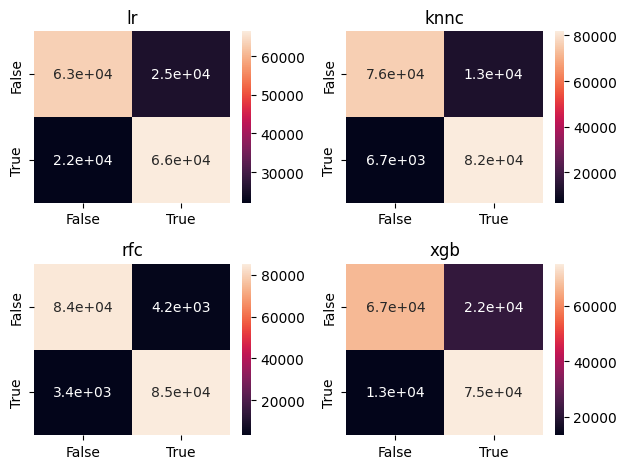

In [51]:
fig, ax = plt.subplots(nrows=2 , ncols=2)
models = ["lr", "knnc", "rfc", "xgb"]
k = 0
for i in range(2):

    for j in range(2):
        sns.heatmap(cm[models[k]], ax=ax[i][j], annot=True, 
                    xticklabels=["False", "True"], yticklabels=["False", "True"]
                    )
        ax[i][j].set_title(models[k])
        k += 1
        
plt.tight_layout()

In [72]:
models = recall.keys()
accuracy = acc.values()
recall_s = recall.values()
prescion = presc.values()
confusion_mat = cm.values()
roc_area = roc.values()
model_number = ["pass 2" for _ in range(4)]

df_metrics = pd.DataFrame({"models" : models, 
                           "accuracy" : accuracy,
                                   "recall" : recall_s, 
                                   "precision_score": prescion, 
                                   "cm": confusion_mat, 
                                   "roc" : roc_area, 
                                   "model number": model_number})


In [73]:
df_metrics.head()

,models,accuracy,recall,precision_score,cm,roc,model number
0,lr,0.732479,0.751223,0.724017,"[[63196, 25346], [22020, 66493]]",0.806069,pass 2
1,knnc,0.891565,0.924373,0.867425,"[[76037, 12505], [6694, 81819]]",0.954848,pass 2
2,rfc,0.956816,0.961305,0.952737,"[[84321, 4221], [3425, 85088]]",0.993498,pass 2
3,xgb,0.802468,0.848915,0.776713,"[[66941, 21601], [13373, 75140]]",0.889156,pass 2


In [74]:

df_metrics["recall"] = round(df_metrics["recall"]*100, 2)
df_metrics["accuracy"] = round(df_metrics["accuracy"]*100, 2)
df_metrics["precision_score"] = round(df_metrics["precision_score"]*100, 2)
df_metrics["roc"] = round(df_metrics["roc"]*100, 2)


In [75]:
df_metrics.head()

,models,accuracy,recall,precision_score,cm,roc,model number
0,lr,73.25,75.12,72.40,"[[63196, 25346], [22020, 66493]]",80.61,pass 2
1,knnc,89.16,92.44,86.74,"[[76037, 12505], [6694, 81819]]",95.48,pass 2
2,rfc,95.68,96.13,95.27,"[[84321, 4221], [3425, 85088]]",99.35,pass 2
3,xgb,80.25,84.89,77.67,"[[66941, 21601], [13373, 75140]]",88.92,pass 2


/tmp/ipykernel_21030/4190038815.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_21030/4190038815.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_21030/4190038815.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_21030/4190038815.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


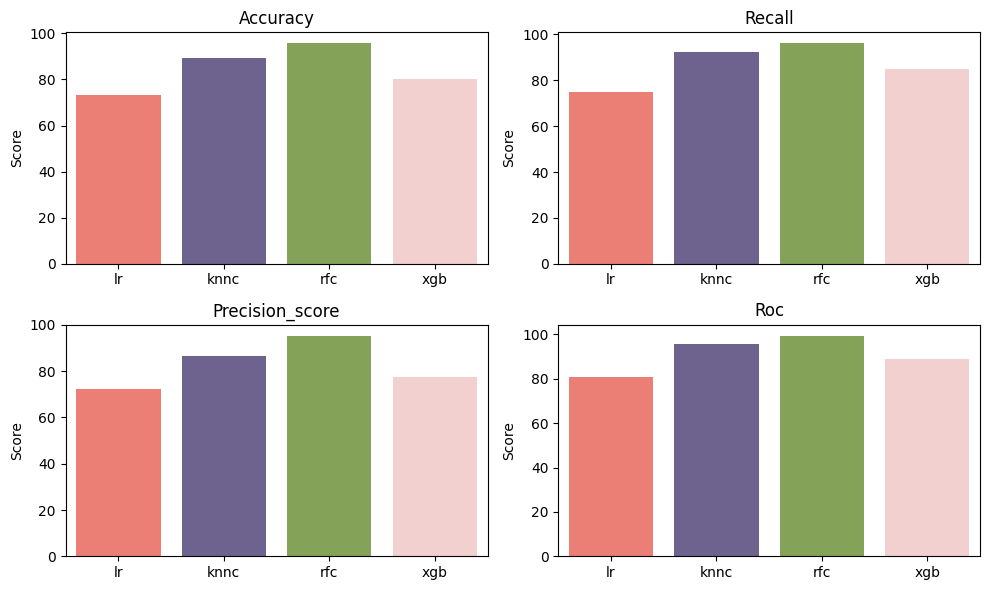

In [83]:

metrics = ["accuracy", "recall", "precision_score", "roc"]


colors = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9"]  

fig, ax = plt.subplots(2, 2, figsize=(10, 6))

for i, metric in enumerate(metrics):
    row, col = divmod(i, 2)
    sns.barplot(
        x="models",
        y=metric,
        data=df_metrics,
        ax=ax[row][col],
        palette=colors   # apply different colors to each bar
    )
    ax[row][col].set_title(metric.capitalize())
    ax[row][col].set_ylabel("Score")
    ax[row][col].set_xlabel("")

plt.tight_layout()
plt.show();


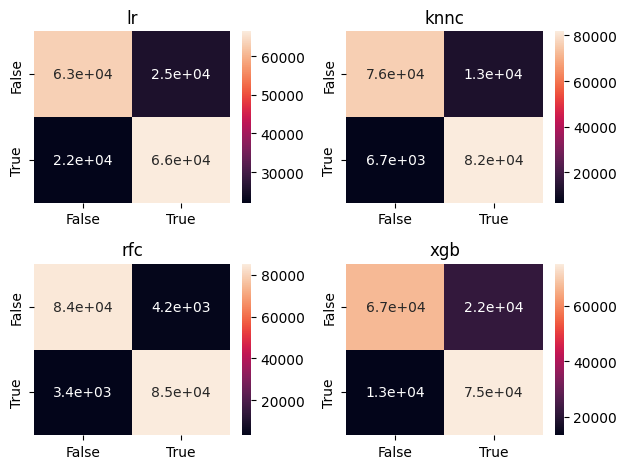

In [85]:
fig, ax = plt.subplots(nrows=2 , ncols=2)
models = ["lr", "knnc", "rfc", "xgb"]
k = 0
for i in range(2):

    for j in range(2):
        sns.heatmap(cm[models[k]], ax=ax[i][j], annot=True, 
                    xticklabels=["False", "True"], yticklabels=["False", "True"]
                    )
        ax[i][j].set_title(models[k])
        k += 1
        
plt.tight_layout()